# Árboles de decisión

Los árboles de decisión son modelos de aprendizaje supervisado no paramétricos, que se forman a partir de reglas binarias (si/no o falso/verdadero). A partir de estas reglas se reparten los datos basándose en sus características y de esa manera se realiza la predicción continua en el caso de regresión, o discreta (de etiqueta) en el caso de clasificación.

Su funcionamiento se basa en dividir el espacio de características en decisiones sencillas, las cuales le proporcionan gran potencial al usarse en conjunto.

Adicionalmente, permiten una representación gráfica sencilla de interpretar, ya que las divisiones realizadas se pueden ver como nodos y representan una pregunta sobre los datos, y las respuestas a esa pregunta se ven como ramas. El resultado final (predicción) se representa como una hoja del árbol.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Ventajas

- En teoría pueden manejar características numéricas y categóricos. En la práctica, depende de la librería. 

- Requieren poca limpieza y preprocesado de los datos.

- Pueden seleccionar características de forma automática.

- Sirven para regresión y clasificación.



## Desventajas

- Su desempeño puede ser inferior al alcanzado con otros modelos.

- Tiende a sobreentrenarse.

- Mediante la combinación de múltiples árboles se pueden mejorar los dos problemas anteriores.

- Son sensibles a clases desbalanceadas.

# Datos

El conjunto de datos que utilizaremos para esta clase será el conjunto de datos Titanic de https://www.kaggle.com/competitions/titanic, con algunas columnas removidas. 

In [2]:
df = pd.read_csv('./datos/titanic.csv')
print(df.shape)
df.head()

(887, 8)


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


Cada datos es un pasajero y cada uno tiene las siguientes características (columnas):

- Survived: 1 = sí, 0 = No
- Pclass (clase): 1 = primera clase, 2 = segunda clase, 3 = tercera clase
- Name
- Sex
- Age: edad en años
- Siblings/Spouses Aboard: Número de cónyuges o hermanos a bordo del pasajero
- Parents/Children Aboard: Número de padres o hijos a bordo del pasajero
- Fare: La tarifa pagada


# Limpieza de datos

La clase a predecir es si el pasajero sobrevivió o no, es decir, la columna **Survived**. Para nuestro caso es irrelevante el nombre del pasajero, por lo cual será removida esta columna.

In [3]:
df = df.drop(['Name'], axis=1) #inplace = True
df

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000
883,1,1,female,19.0,0,0,30.0000
884,0,3,female,7.0,1,2,23.4500
885,1,1,male,26.0,0,0,30.0000


Con el método `.info()` podemos notar que hay una característica que es tipo objeto, en este caso el género del pasajero. En scikit-learn (librería que usaremos para entrenar el árbol de decisión), las variables categóricas deben convertirse en variables numéricas, conocidas como *dummy* o *one-hot encoding*. Esto lo haremos con la función `get_dummies` de `Pandas`.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Sex                      887 non-null    object 
 3   Age                      887 non-null    float64
 4   Siblings/Spouses Aboard  887 non-null    int64  
 5   Parents/Children Aboard  887 non-null    int64  
 6   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.6+ KB


In [5]:
df = pd.get_dummies(df, columns=['Sex'], dtype=int,  drop_first=True)
df.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Age                      887 non-null    float64
 3   Siblings/Spouses Aboard  887 non-null    int64  
 4   Parents/Children Aboard  887 non-null    int64  
 5   Fare                     887 non-null    float64
 6   Sex_male                 887 non-null    int32  
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.2 KB


In [7]:
df.rename(columns={"Sex_male": "Sex"}, inplace=True)

In [8]:
df.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


# Entrenamiento de Árbol de Decisión con Scikit-learn

Separamos las etiquetas del Dataframe

In [9]:
X = df.drop('Survived', axis = 1)
y = df.Survived

In [10]:
X

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...
882,2,27.0,0,0,13.0000,1
883,1,19.0,0,0,30.0000,0
884,3,7.0,1,2,23.4500,0
885,1,26.0,0,0,30.0000,1


In [11]:
y

0      0
1      1
2      1
3      1
4      0
      ..
882    0
883    1
884    0
885    1
886    0
Name: Survived, Length: 887, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [13]:
# Importamos las librerias para la creacion del modelo
from sklearn.tree import DecisionTreeClassifier

# Definir el clasificador y los valores de los hiperparámetros a probar
clf = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=4)

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [14]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

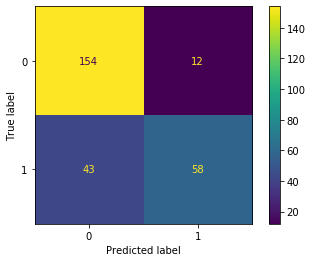

In [15]:
# Graficamos matriz de confusion
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_test_pred,labels=clf.classes_)
ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot()

In [16]:
from sklearn.metrics import accuracy_score
print('El accuracy en train es:',accuracy_score(y_train,y_train_pred))
print('El accuracy en test es:', accuracy_score(y_test,y_test_pred))

El accuracy en train es: 0.8612903225806452
El accuracy en test es: 0.7940074906367042


In [17]:
clf.feature_importances_

array([0.18598086, 0.08654054, 0.0671376 , 0.01534732, 0.04787428,
       0.59711939])

In [18]:
clf.feature_importances_.sum()

1.0

<BarContainer object of 6 artists>

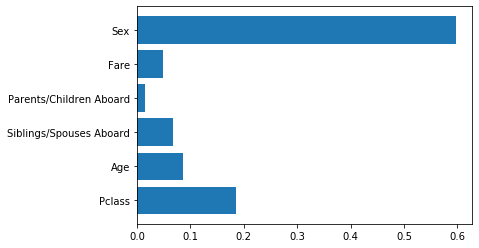

In [19]:
plt.barh(X_train.columns,clf.feature_importances_, )

In [20]:
X.head()

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1


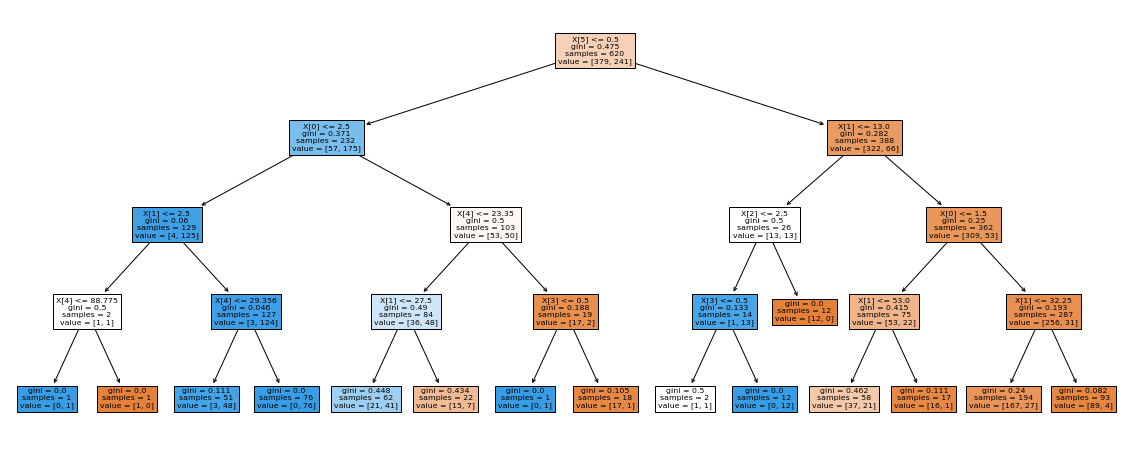

In [21]:
plt.figure(figsize = (20,8))
from sklearn import tree

tree.plot_tree(clf,filled=True)
plt.savefig('Resultados.pdf', transparent=True, dpi=300)